In [175]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

In [129]:
from langdetect import detect_langs
import pycountry as pc
import ujson as json
import itertools as it
import functools as ft
from tqdm import tqdm

In [17]:
with open("/media/jakob/bigdata/train/SB.json", 'rb') as cat_file:
    catalog = json.load(cat_file)

In [130]:
prediction = dict()
for page in tqdm(catalog['pages']):
    text_lines = [line['text'] for line in page['lines']]
    text = ''.join(text_lines) 
    if (len(text) > 0):
        page['languages'] = detect_langs(text)
        prediction[page['path']] =  page['languages']

100%|██████████| 4432/4432 [00:52<00:00, 84.86it/s]


In [131]:
with open("/media/jakob/bigdata/train/SB_lang.json", 'wb') as cat_file:
    json.dump(catalog, cat_file, ensure_ascii=False,indent=2, escape_forward_slashes=False)

# Plots

In [145]:
print detect_langs("Das ist ein Test")
print detect_langs("This ist nicht wirklich a test")

[de:0.999995868477]
[en:0.571426223358, de:0.428573052121]


In [132]:
def append(langs, lang): 
    langs.extend(lang)
    return langs
lang_probs = [(lang.lang, lang.prob) for lang in ft.reduce(append, prediction.values(), list())]

In [165]:
language_count = sorted([(pc.languages.get(iso639_1_code=key).name, len(list(group)))
 for key, group in it.groupby(sorted(lang_probs), lambda lang: lang[0])], key=lambda lang: lang[1])

In [166]:
counts = [ n for lang, n in language_count]
langs  = [ lang for lang, n in language_count]


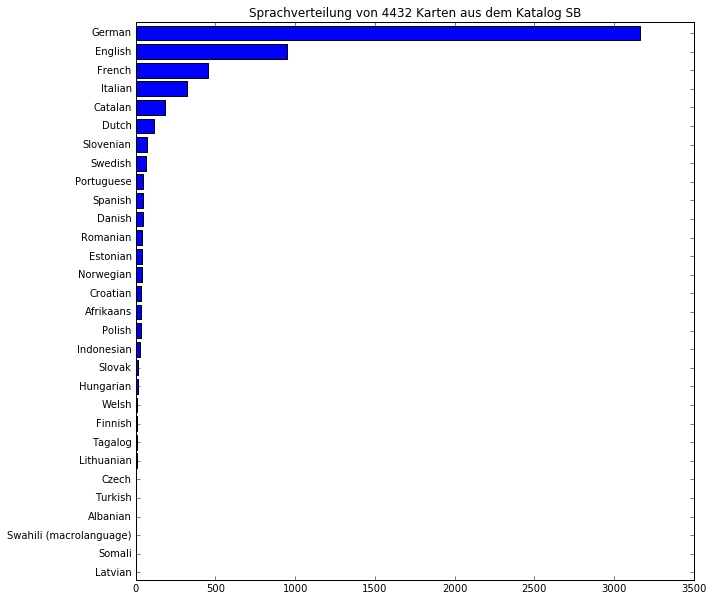

In [181]:
ind = np.arange(len(counts)) + 0.4
fig, ax = plt.subplots()
fig.set_size_inches((10,10))

ax.barh(range(len(counts)),counts)
ax.set_yticklabels(langs)
ax.set_yticks(ind)
ax.set_title("Sprachverteilung von {} Karten aus dem Katalog {}".format(len(catalog['pages']), catalog['name']))